In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline


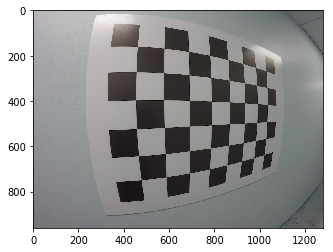

In [2]:
img = cv2.imread(r'C:\Users\saurabhsudhk\Downloads\CarND-Camera-Calibration-master\calibration_wide\GOPR0032.jpg')#mpimg.imread(r'C:\Users\saurabhsudhk\Downloads\Sample_Calibration_Images\sample.jpg')

plt.imshow(img)

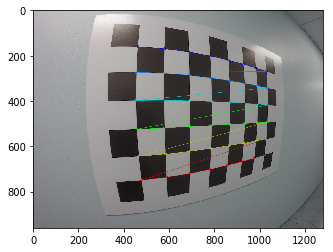

In [3]:
objpoints = [] # 3D points in real world image
imgpoints = [] # 2D points in image World

objp = np.zeros((6*8,3),np.float32)

objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)  # x-y co-ordinates
# Grey scale conversion
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#plt.imshow(grey)
ret,corners = cv2.findChessboardCorners(img,(8,6),None)
#print(corners)
if ret == True:
    objpoints.append(objp)
    imgpoints.append(corners)
    
    #Draw Chess board corners
    cv2.drawChessboardCorners(img,(8,6), corners, ret)
    plt.imshow(img)

In [18]:
images = glob.glob(r'C:\Users\saurabhsudhk\Downloads\CarND-Camera-Calibration-master\calibration_wide\*.jpg')

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()


[[560.38471111   0.         651.300046  ]
 [  0.         561.41339732 499.15460097]
 [  0.           0.           1.        ]]


Text(0.5, 1.0, 'Undistorted Image')

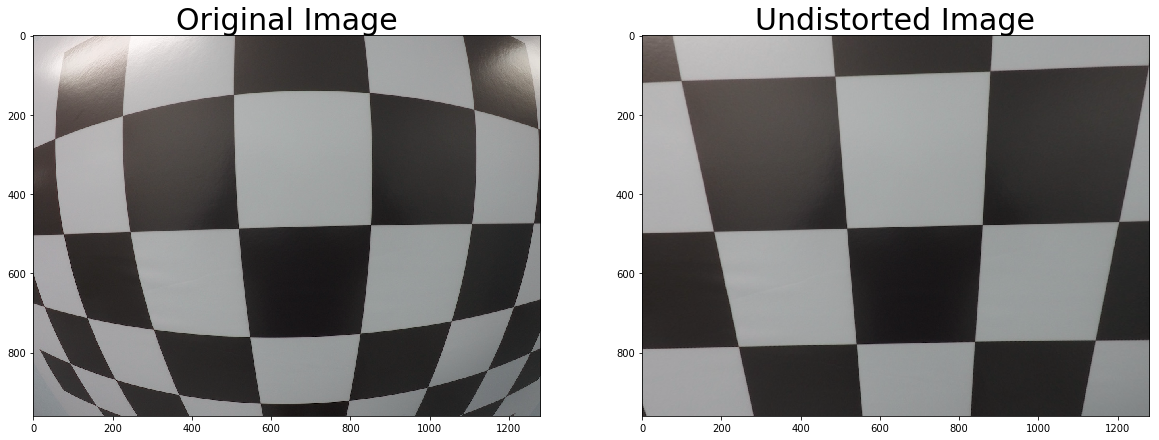

In [17]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread(r'C:\Users\saurabhsudhk\Downloads\CarND-Camera-Calibration-master\calibration_wide\test_image.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
# ret -> Ignore
# mtx -> Camera Transformation Matrix
# Dist -> Distortion Coefficient
# rvecs ->Rotational Vector
# tvecs ->Translation Vector

dst = cv2.undistort(img, mtx, dist, None, mtx)
# Save the camera calibration result for later use
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open(r'C:\Users\saurabhsudhk\Downloads\CarND-Camera-Calibration-master\calibration_wide\wide_dist_pickle.p', "wb" ) )
print(mtx)
#visualise distorted and undistorted image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)
